# **1. 환경 설정 및 데이터 구조 파악**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
coronaDF = pd.read_csv('./covid_19_clean_complete.csv')

In [ ]:
coronaDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
# 결측값 확인
coronaDF.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
# 데이터 타입 조회
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
# date 정보 수정(object -> datetime)
coronaDF['Date'] = pd.to_datetime(coronaDF['Date'])

# **2. 국가별 최신 확진자, 사망자, 회복자 데이터 분석**

In [ ]:
# 최신 데이터만 남기기
latestDF = coronaDF[coronaDF['Date'] == max(coronaDF['Date'])]

In [ ]:
latestDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
# 국가별 합계 구하기
latest_country_sum = latestDF.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
latest_country_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
...,...,...,...,...
182,West Bank and Gaza,10621,78,3752
183,Western Sahara,10,1,8
184,Yemen,1691,483,833
185,Zambia,4552,140,2815


In [ ]:
# 사망자가 높은 국가순으로 정렬하기
latest_country_sum = latest_country_sum.sort_values(by='Deaths', ascending=False).reset_index(drop=True)
latest_country_sum

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,United Kingdom,301708,45844,1437
3,Mexico,395489,44022,303810
4,Italy,246286,35112,198593
...,...,...,...,...
182,Laos,20,0,19
183,Greenland,14,0,13
184,Cambodia,226,0,147
185,Grenada,23,0,23


In [ ]:
# 데이터 전체 조회하기(표)
latest_country_sum.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,United Kingdom,301708,45844,1437
3,Mexico,395489,44022,303810
4,Italy,246286,35112,198593
5,India,1480073,33408,951166
6,France,220352,30212,81212
7,Spain,272421,28432,150376
8,Peru,389717,18418,272547
9,Iran,293606,15912,255144


# **3. 시간에 따른 확진자, 사망자, 회복자 시각화**

In [ ]:
# 날짜별 확진자, 사망자, 회복자 합계 구하기
date_status = coronaDF.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().sort_index()
date_status

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-07-23,15510481,633506,8710969
2020-07-24,15791645,639650,8939705
2020-07-25,16047190,644517,9158743


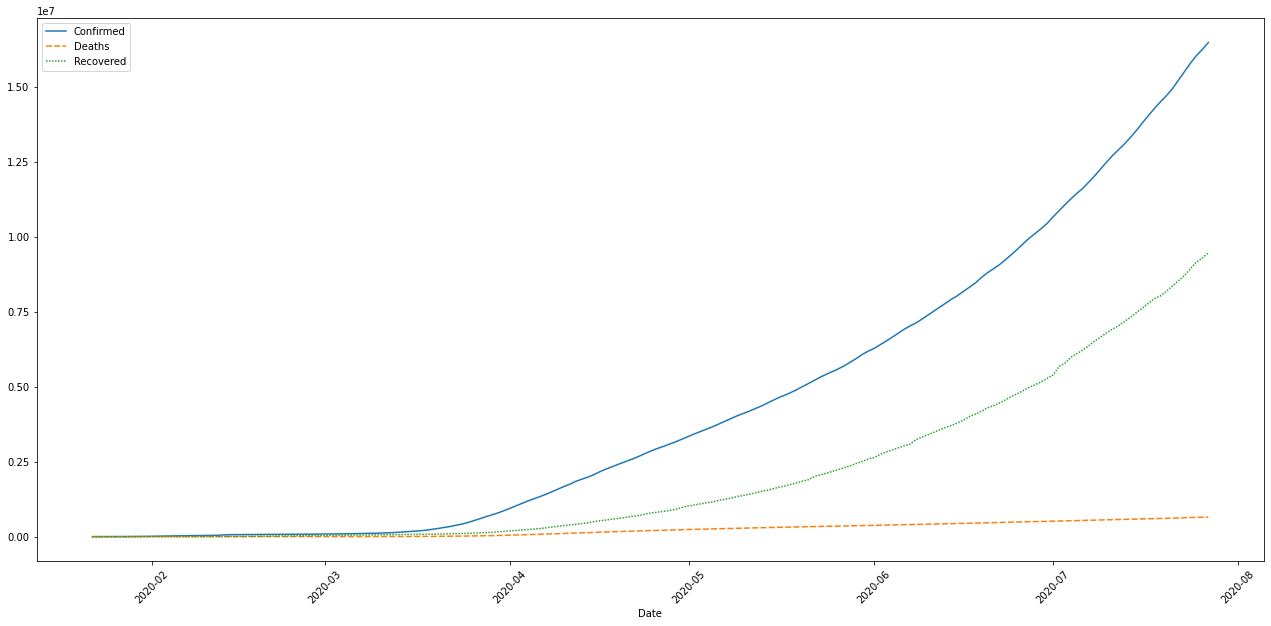

In [ ]:
# 시간에 따른 누적 확진자, 사망자, 회복자 그래프(라인)
import seaborn as sns

plt.figure(figsize=(22, 10))
plt.xticks(rotation=45)
sns.lineplot(data=date_status)


# **4. seaborn**

* matplotlib을 사용하기 쉽게 해주는 라이브러리
* [seaborn 공식 도큐먼트 살펴보기](https://seaborn.pydata.org/)
* matplotlib으로 대부분 시각화는 가능하지만 seaborn에서만 제공되는 통계기반 plot가 존제
* pandas 데이터프레임과 호환성이 좋음
* 스타일링을 신경쓰지 않아도 default 컬러가 예쁘게 조합

In [ ]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


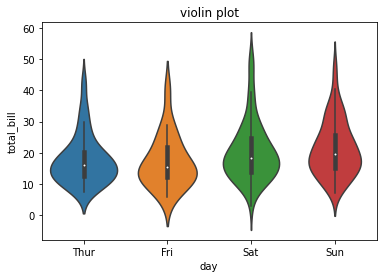

In [ ]:
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('violin plot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


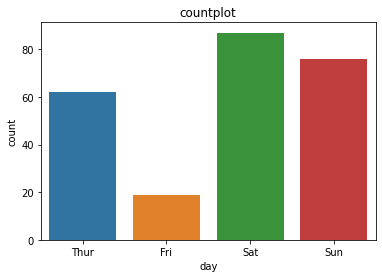

In [ ]:
sns.countplot(tips['day'])
plt.title('countplot')
plt.show()

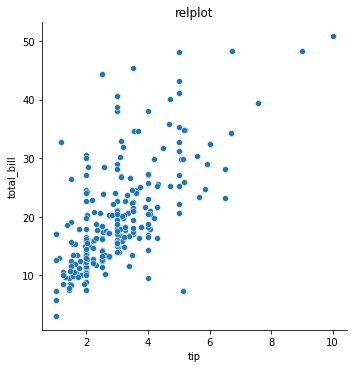

In [ ]:
sns.relplot(x='tip', y='total_bill', data=tips)
plt.title('relplot')
plt.show()

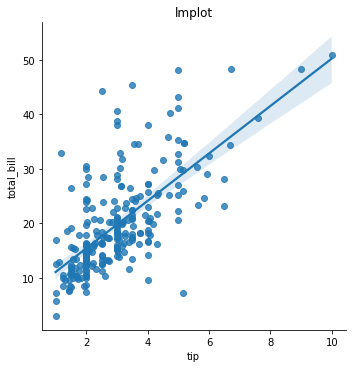

In [ ]:
sns.lmplot(x='tip', y='total_bill', data=tips)
plt.title('lmplot')
plt.show()

# **5. 전세계 코로나 바이러스 감염 지도 표시**

In [ ]:
import folium

In [ ]:
m = folium.Map()

In [ ]:
m

In [ ]:
m = folium.Map(location=[37.500007,127.035459], zoom_start=20)
m

In [ ]:
m = folium.Map(location=[37.500007,127.035459], zoom_start=20)
folium.CircleMarker([37.500007,127.035459], radius=100, color="#ef9008", fill="True", fill_color="#ef9008", popup="코리아IT아카데미").add_to(m)
m

In [ ]:
# 지도에 전세계 국가별 확진자 수 CircleMarker로 표시하기
m = folium.Map(location=[0, 0], zoom_start=4)
for n in latestDF.index:
  folium.CircleMarker([latestDF['Lat'][n], latestDF['Long'][n]],\
                       radius=int(latestDF['Confirmed'][n]/10000), color='red', fill='True', fill_color='red', \
                       popup=latestDF['Country/Region'][n] + ":" + str(latestDF['Confirmed'][n])).add_to(m)

In [ ]:
m